In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Dataframe display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# 1. Read data, explore its dimensions and types

In [4]:
dataset = pd.read_csv('./data/PCOS_infertility.csv')
print(dataset.shape)
dataset.head(2)

(541, 6)


,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53


In [6]:
dataset.dtypes

Sl. No                      int64
Patient File No.            int64
PCOS (Y/N)                  int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)    float64
AMH(ng/mL)                 object
dtype: object

#### AMH is object, however, it contains numbers. Converting into float.

In [12]:
dataset.loc[dataset['AMH(ng/mL)'] == 'a', 'AMH(ng/mL)'] = np.nan
dataset['AMH(ng/mL)'] = dataset['AMH(ng/mL)'].astype(float)

In [13]:
dataset.describe()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
count,541.000000,541.000000,541.000000,541.000000,541.000000,540.000000
mean,271.000000,10271.000000,0.327172,664.549235,238.229518,5.624191
std,156.317519,156.317519,0.469615,3348.920576,1603.826221,5.881608
min,1.000000,10001.000000,0.000000,1.300000,0.110417,0.100000
25%,136.000000,10136.000000,0.000000,1.990000,1.990000,2.010000
50%,271.000000,10271.000000,0.000000,20.000000,1.990000,3.700000
75%,406.000000,10406.000000,1.000000,297.210000,97.630000,6.925000
max,541.000000,10541.000000,1.000000,32460.970000,25000.000000,66.000000


#### Only a single missing data point in PCOS_infertility

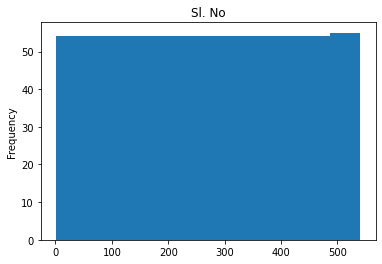

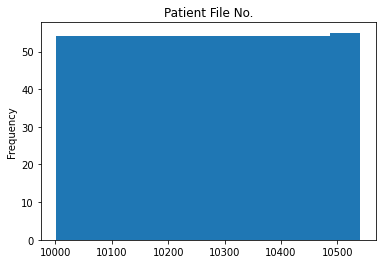

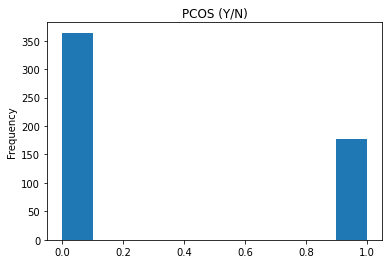

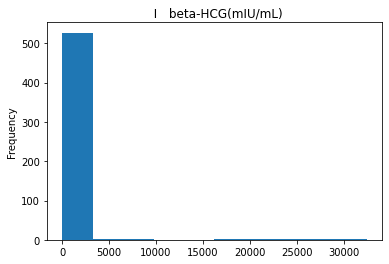

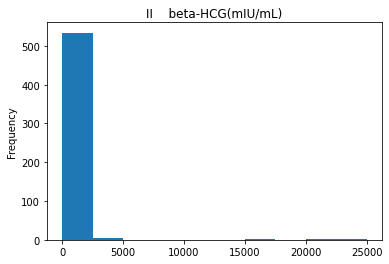

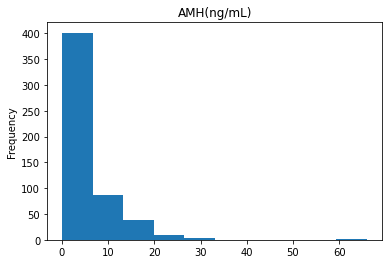

In [17]:
for col in dataset.columns:
    dataset[col].plot(kind = 'hist')
    plt.title(col)
    plt.show()

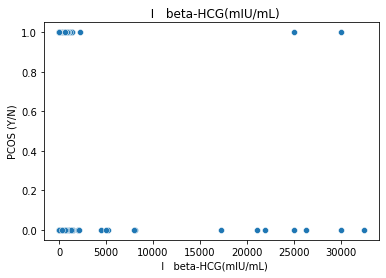

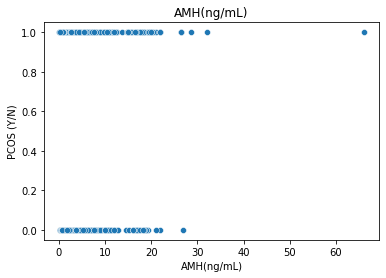

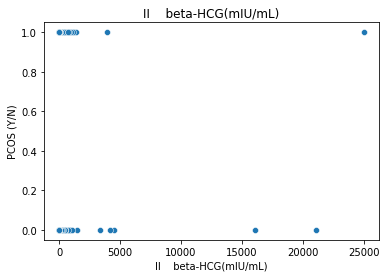

In [22]:
for col in set(dataset.columns) - {'PCOS (Y/N)', 'Sl. No', 'Patient File No.'}:
    plt.figure()
    sns.scatterplot(data=dataset, x=col, y='PCOS (Y/N)')
    plt.title(col)